# Laying things out in a grid

Matplotlib doesn't make this easy!  There's also more than one way to do it, and some surprising exceptions. Things to bear in mind when doing layouts:

* The terminology is as follows:
  * **figure** - the entire graphic
  * **subplot** (or, confusingly,  **axis**) - a chart within a figure, including legend, labels, etc
* The default API is state-based. That is, any time you call a command, the previous commands matter, even if you're not explicitly referencing them. So `plt.figure()` makes a figure, `plt.add_subplot(111)` adds a subplot to that figure, etc

[This is an excellent primer](http://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/how-pandas-uses-matplotlib-plus-figures-axes-and-subplots/), worth reading all the way through.

If you want to lay things out in grids that span colums, with varying widths, you need to use a `GridSpec`. You also need to do this if you want to nest subplots within each other.  Therefore, the recommended layout methods below always use gridspecs, because you *might as well*. 

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from ebmdatalab import maps, charts



## Show two charts side-by-side

<module 'matplotlib.pyplot' from '/home/seb/.local/share/virtualenvs/jupyter/local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

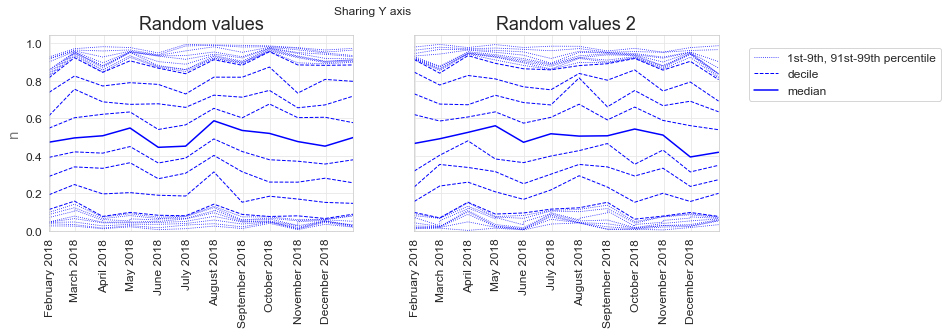

In [73]:
# Make the figure. `figsize` is defined in inches; to vary how this 
# is rendered to pixels, you can also provide a `dpi` argument
f = plt.figure(figsize=(12, 4))
f.suptitle('Sharing Y axis')

# This magically aligns dates
f.autofmt_xdate()

# Define a layout that is one row deep and two columns wide. 
# Note that passing in a `figure` is optional due to the statefulness of the pyplot interface, mentioned above
layout = gridspec.GridSpec(1, 2, figure=f)

# Get references to the axes for each of the two cells, for us to 
# pass to plotting functions later
left_plot = plt.subplot(layout[0])
right_plot = plt.subplot(layout[1], sharey=ax1)  # Share the Y axis 
# ...and because it's shared, suppress ticks on the second chart
plt.setp(right_plot.get_yticklabels(), visible=False)  


# make a datafrom with a date column and values columns
df = pd.DataFrame(np.random.rand(1000, 2), columns=['val1', 'val2'])
months = pd.date_range('2018-01-01', periods=12, freq='M')
df['month'] = np.random.choice(months, len(df))

# Plot a deciles chart on the left axis
charts.deciles_chart(
    df,
    period_column='month',
    column='val1',
    title="Random values",
    ylabel="n",
    show_outer_percentiles=True,
    show_legend=False,
    ax=left_plot)

# ...and one on the right axis
charts.deciles_chart(
    df,
    period_column='month',
    column='val2',
    title="Random values 2",
    show_outer_percentiles=True,
    show_legend=True,
    ax=right_plot)

## Showing a map and a chart side-by-side

This is slightly weird, because our map function itself uses two subplots (one for the England map, and the other for the London breakout), and uou can only nest subplots if you do it within a `SubplotSpec`So, instead of passing a subplot through to the map-drawing function, we have to pass a subplot spec.

It happens that `GridSpec` creates an array of `SubplotSpec`, so that's what we pass through.

/home/seb/.local/share/virtualenvs/jupyter/local/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


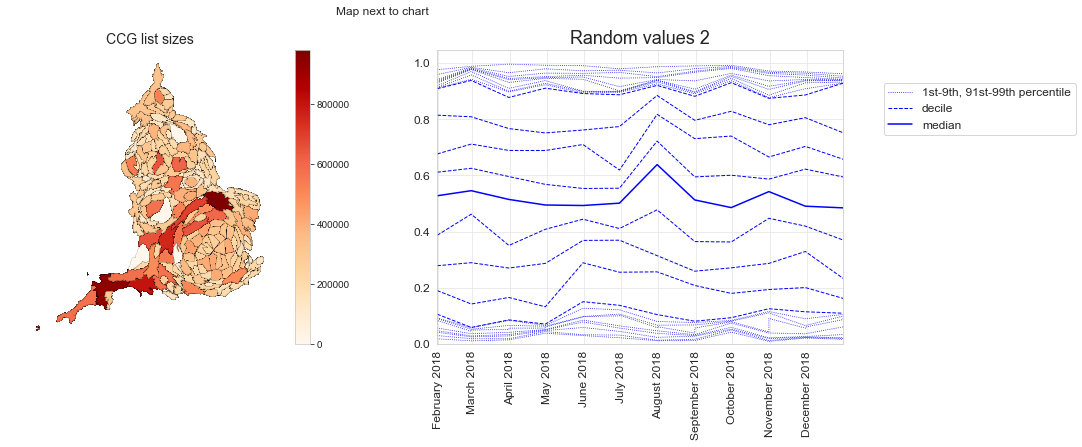

In [74]:
f = plt.figure(figsize=(16, 6))
f.suptitle('Map next to chart')
f.autofmt_xdate()

# Define a layout that is one row deep and two columns wide
layout = gridspec.GridSpec(1, 2, figure=f)

# Get subplot references for these two cells

# Per above, we have to pass a subplot_spec to maps
subplot_spec = layout[0]   

# For the chart, an axis will suffice
ax2 = plt.subplot(layout[1]) 

# Put a map on the left
df = pd.read_json('ccg_list_size.json')
df.columns = ['date', 'pct', 'ccg_name', 'total_list_size']  # The CCG column must be named 'pct'
maps.ccg_map(df, title="CCG list sizes", column='total_list_size', 
             cartogram=True, separate_london=False, 
             subplot_spec=subplot_spec)


# Put a chart on the right
df = pd.DataFrame(np.random.rand(1000, 2), columns=['val1', 'val2'])
months = pd.date_range('2018-01-01', periods=12, freq='M')
df['month'] = np.random.choice(months, len(df))
charts.deciles_chart(
    df,
    period_column='month',
    column='val2',
    title="Random values 2",
    show_outer_percentiles=True,
    show_legend=True,
    ax=ax2
)
plt.show()
